In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
pp = pprint.PrettyPrinter(indent=4)

In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
harvard_sentiment_df = pd.read_csv('processed_data/harvard/harvard_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [6]:
harvard_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,l26vnc,yonsah,102.0,0.98,39,Harvard,I just received an email stating that they rec...,"[{'author': 'None', 'body': '[deleted]', 'scor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
1,t287da,yesseecahh,22.0,0.85,4,Harvard,My friend and I are chemistry graduate student...,"[{'author': 'gacdeuce', 'body': 'Miracle of Sc...","{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'comp...",0.072,0.000,0.5574
2,l2vwb7,yasme996,31.0,0.93,19,Harvard,I'm a student at another college and was wonde...,"[{'author': 'None', 'body': 'I’m a Berkeley st...","{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",0.094,0.000,0.5157
3,ioerw2,xyzaffairs,75.0,0.98,19,Harvard,First-year on campus right now. Everyone seems...,"[{'author': 'pinkstardust007', 'body': ""Don't ...","{'neg': 0.104, 'neu': 0.798, 'pos': 0.098, 'co...",0.098,0.104,-0.1635
4,fqku9j,xyzaffairs,26.0,0.86,25,Harvard,Hi! I'm in the process of making the hardest b...,"[{'author': 'tomfjord', 'body': 'If you’re fro...","{'neg': 0.008, 'neu': 0.71, 'pos': 0.283, 'com...",0.283,0.008,0.9970
...,...,...,...,...,...,...,...,...,...,...,...,...
489,jq7kae,9986000min,29.0,0.98,8,Harvard,Someone sent me an email detailing a tentative...,"[{'author': 'impendinggreatness', 'body': 'I h...","{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154,0.000,0.5362
490,tb0gdr,7ranslunar,25.0,0.88,5,Harvard,Hi everyone! I’m a first year who got quadded ...,"[{'author': 'None', 'body': 'I mean, it’s not ...","{'neg': 0.102, 'neu': 0.771, 'pos': 0.127, 'co...",0.127,0.102,0.4462
491,lrzmd4,656c696a6168,20.0,0.88,12,Harvard,"As a student or as a tour destination, either ...","[{'author': 'mikepetroff', 'body': ""Janis Jopl...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
492,ryobcm,4YearAbsence,39.0,0.98,13,Harvard,My last semester at the college was in Fall of...,"[{'author': '1d4d5_2Bf4', 'body': ""1. Yep that...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...",0.046,0.000,0.8541


In [7]:
def compute_aggregated_comment_sentiment_simple(comment_list):
  res_dict = {'neg':0.0, 'pos':0.0, 'compound':0.0}
  for comment_dict in comment_list:
    comment_sentiment_dict = analyzer.polarity_scores(comment_dict['body'])
    res_dict['neg'] += comment_sentiment_dict['neg']
    res_dict['pos'] += comment_sentiment_dict['pos']
    res_dict['compound'] += comment_sentiment_dict['compound']

  return res_dict

In [9]:
harvard_sentiment_df['comments'] = harvard_sentiment_df['comments'].apply(lambda x: eval(x))
harvard_sentiment_df['agg_comment_sentiment_dict'] = harvard_sentiment_df['comments'].apply(lambda x: compute_aggregated_comment_sentiment_simple(x))
harvard_sentiment_df['post_sentiment_dict'] = harvard_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [10]:
harvard_sentiment_df['agg_comment_compound'] = harvard_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['compound'])
harvard_sentiment_df['agg_comment_pos']  = harvard_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['pos'])
harvard_sentiment_df['agg_comment_neg'] = harvard_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['neg'])

In [11]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
harvard_centrality_df = pd.read_csv('processed_data/harvard/harvard_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [12]:
harvard_regression_df = harvard_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'agg_comment_compound', 'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio']].merge(harvard_centrality_df, on='author', how='left')

In [13]:
harvard_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,agg_comment_compound,agg_comment_pos,agg_comment_neg,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yonsah,0.000,0.000,39,0.0000,0.7169,0.829,1.364,0.98,0.007413,0.006072,0.033575,0.000607,0.044444
1,yesseecahh,0.072,0.000,4,0.5574,2.5010,0.904,0.029,0.85,0.000200,0.001821,0.030097,0.000607,0.333333
2,yasme996,0.094,0.000,19,0.5157,-0.8415,0.393,0.355,0.93,0.003847,0.005464,0.033693,0.000607,0.083333
3,xyzaffairs,0.098,0.104,19,-0.1635,8.0758,2.104,0.343,0.98,0.007672,0.010929,0.046053,0.000607,0.078431
4,xyzaffairs,0.283,0.008,25,0.9970,6.7670,1.724,0.199,0.86,0.007672,0.010929,0.046053,0.000607,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,9986000min,0.154,0.000,8,0.5362,0.5178,0.547,0.421,0.98,0.000082,0.003643,0.008060,0.000607,0.000000
490,7ranslunar,0.127,0.102,5,0.4462,4.0137,1.166,0.132,0.88,0.001851,0.003036,0.028423,0.000607,0.100000
491,656c696a6168,0.000,0.000,12,0.0000,2.2075,0.978,0.294,0.88,0.003456,0.006072,0.013241,0.000607,0.022222
492,4YearAbsence,0.046,0.000,13,0.8541,5.0521,1.925,0.121,0.98,0.003801,0.004857,0.032664,0.000607,0.071429


In [16]:
harvard_regression_avg_df = harvard_regression_df.groupby('eig_centrality').mean()

In [17]:
harvard_regression_avg_df = harvard_regression_df.reset_index()

In [18]:
harvard_regression_avg_df.columns

Index(['index', 'eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'agg_comment_compound',
       'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [19]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [20]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



In [21]:
# for all values of eig_centrality
X = harvard_regression_avg_df[['eig_centrality', 'num_comments']].values
y = harvard_regression_avg_df['agg_comment_pos'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4742
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.623
Time:                        20:54:57   Log-Likelihood:                -356.64
No. Observations:                 348   AIC:                             719.3
Df Residuals:                     345   BIC:                             730.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3145      0.067     19.673      0.0

In [25]:
# for all values of eig_centrality
harvard_regression_avg_df['ln_eig_centrality'] = np.log(harvard_regression_avg_df['eig_centrality'])
X = harvard_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['agg_comment_compound'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4363
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.727
Time:                        20:55:45   Log-Likelihood:                -737.24
No. Observations:                 348   AIC:                             1482.
Df Residuals:                     344   BIC:                             1498.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2218      1.890      1.176      0.2

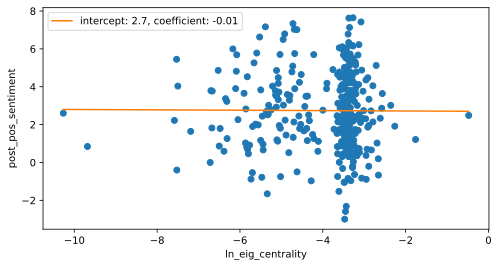

In [26]:
fit_regression_line_intercept(harvard_regression_avg_df['agg_comment_compound'].values, 
                              harvard_regression_avg_df['ln_eig_centrality'].values, 'ln_eig_centrality')